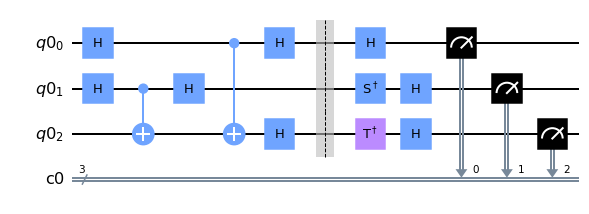

In [1]:
from qiskit import *
qr1 = QuantumRegister(3)
cr1 = ClassicalRegister(3)
xya = QuantumCircuit(qr1, cr1)
%matplotlib inline
xya.h(qr1[0])
xya.h(qr1[1])
xya.cx(qr1[1],qr1[2])
xya.h(qr1[1])
xya.cx(qr1[0],qr1[2])
xya.h(qr1[0])
xya.h(qr1[2])

xya.barrier(qr1)

xya.tdg(qr1[2])
xya.h(qr1[0])
xya.sdg(qr1[1])
xya.h(qr1[1])
xya.h(qr1[2])
xya.measure(qr1, cr1)
xya.draw(output='mpl')

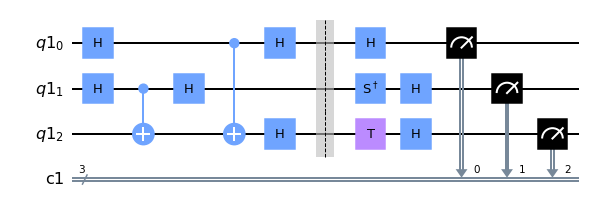

In [2]:
qr2 = QuantumRegister(3)
cr2 = ClassicalRegister(3)
xyb = QuantumCircuit(qr2, cr2)
%matplotlib inline
xyb.h(qr2[0])
xyb.h(qr2[1])
xyb.cx(qr2[1],qr2[2])
xyb.h(qr2[1])
xyb.cx(qr2[0],qr2[2])
xyb.h(qr2[0])
xyb.h(qr2[2])

xyb.barrier(qr2)

xyb.t(qr2[2])
xyb.h(qr2[0])
xyb.sdg(qr2[1])
xyb.h(qr2[1])
xyb.h(qr2[2])
xyb.measure(qr2, cr2)
xyb.draw(output='mpl')

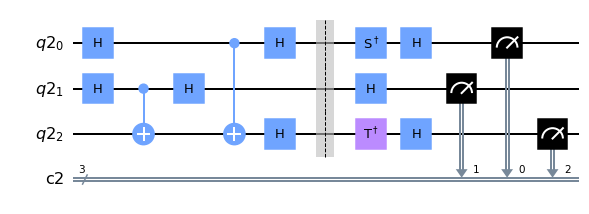

In [3]:
qr3 = QuantumRegister(3)
cr3 = ClassicalRegister(3)
yxa = QuantumCircuit(qr3, cr3)
%matplotlib inline
yxa.h(qr3[0])
yxa.h(qr3[1])
yxa.cx(qr3[1],qr3[2])
yxa.h(qr3[1])
yxa.cx(qr3[0],qr3[2])
yxa.h(qr3[0])
yxa.h(qr3[2])

yxa.barrier(qr3)

yxa.tdg(qr3[2])
yxa.sdg(qr3[0])
yxa.h(qr3[0])
yxa.h(qr3[1])
yxa.h(qr3[2])
yxa.measure(qr3, cr3)
yxa.draw(output='mpl')

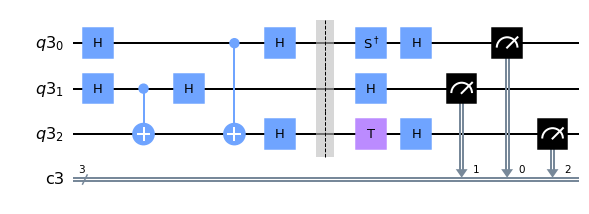

In [4]:
qr4 = QuantumRegister(3)
cr4 = ClassicalRegister(3)
yxb = QuantumCircuit(qr4, cr4)
%matplotlib inline
yxb.h(qr4[0])
yxb.h(qr4[1])
yxb.cx(qr4[1],qr4[2])
yxb.h(qr4[1])
yxb.cx(qr4[0],qr4[2])
yxb.h(qr4[0])
yxb.h(qr4[2])

yxb.barrier(qr4)

yxb.t(qr4[2])
yxb.sdg(qr4[0])
yxb.h(qr4[0])
yxb.h(qr4[1])
yxb.h(qr4[2])
yxb.measure(qr4, cr4)
yxb.draw(output='mpl')

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_santiago')
job1 = execute(xya, backend=qcomp,shots = 4096)
job2 = execute(xyb, backend=qcomp,shots = 4096)
job3 = execute(yxa, backend=qcomp,shots = 4096)
job4 = execute(yxb, backend=qcomp,shots = 4096)
from qiskit.tools.monitor import job_monitor

In [6]:
job_monitor(job1)
job_monitor(job2)
job_monitor(job3)
job_monitor(job4)

Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run
Job Status: job has successfully run


In [7]:
result1 = job1.result()
result2 = job2.result()
result3 = job3.result()
result4 = job4.result()
from qiskit.tools.visualization import plot_histogram

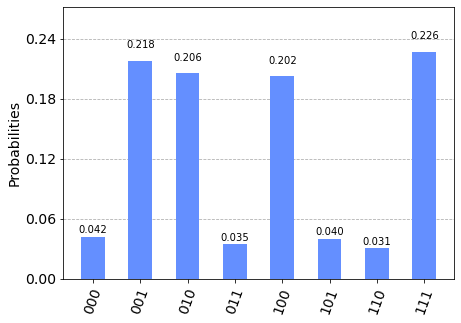

In [8]:
plot_histogram(result1.get_counts(xya))

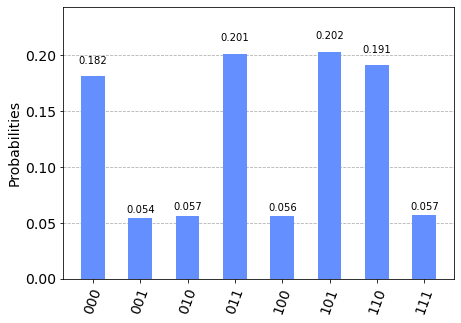

In [9]:
plot_histogram(result2.get_counts(xyb))

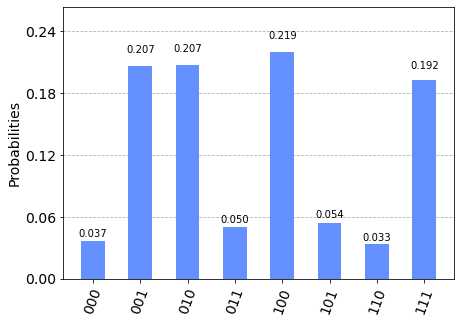

In [10]:
plot_histogram(result3.get_counts(yxa))

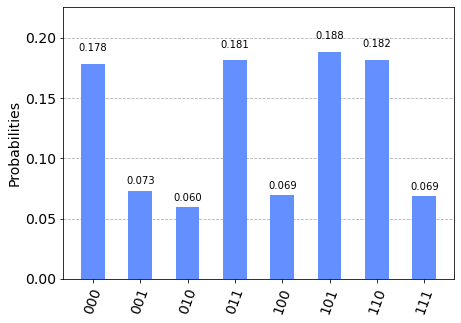

In [11]:
plot_histogram(result4.get_counts(yxb))

In [12]:
p1=((result1.get_counts(xya)['000']
     +result1.get_counts(xya)['011']
     +result1.get_counts(xya)['101']
     +result1.get_counts(xya)['110']
  
    -(result1.get_counts(xya)['001']
     +result1.get_counts(xya)['010']
     +result1.get_counts(xya)['100']
     +result1.get_counts(xya)['111']
)
      )/4096)
print(p1)

-0.7041015625


In [13]:
p2=((result2.get_counts(xyb)['000']
     +result2.get_counts(xyb)['011']
     +result2.get_counts(xyb)['101']
     +result2.get_counts(xyb)['110']
  
    -(result2.get_counts(xyb)['001']
     +result2.get_counts(xyb)['010']
     +result2.get_counts(xyb)['100']
     +result2.get_counts(xyb)['111']
)
      )/4096)
print(p2)

0.55126953125


In [14]:
p3=((result3.get_counts(yxa)['000']
     +result3.get_counts(yxa)['011']
     +result3.get_counts(yxa)['101']
     +result3.get_counts(yxa)['110']
  
    -(result3.get_counts(yxa)['001']
     +result3.get_counts(yxa)['010']
     +result3.get_counts(yxa)['100']
     +result3.get_counts(yxa)['111']
)
      )/4096)
print(p3)

-0.650390625


In [15]:
p4=((result4.get_counts(yxb)['000']
     +result4.get_counts(yxb)['011']
     +result4.get_counts(yxb)['101']
     +result4.get_counts(yxb)['110']
  
    -(result4.get_counts(yxb)['001']
     +result4.get_counts(yxb)['010']
     +result4.get_counts(yxb)['100']
     +result4.get_counts(yxb)['111']
)
      )/4096)
print(p4)

0.45751953125


In [16]:
print(abs(p1)+abs(p2)+abs(p3)+abs(p4))

2.36328125
